# Web Scraping Using Selenium

### Import Required Packages

In [29]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

### Import Packages for install Chrome Driver Manager

In [30]:
from webdriver_manager.chrome import ChromeDriverManager

In [31]:
#Install Chrome Driver Manager
driver = webdriver.Chrome(ChromeDriverManager().install())

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\Anju\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache
C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\3510924789.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [32]:
#Maximize the window size of Chrome
driver.maximize_window()

In [6]:
#Access website you wish to scrape through selenium driver
driver.get("https://hoopshype.com/salaries/players/")

In [33]:
# Declare an implicit wait to locate the expected element
driver.implicitly_wait(10)

In [11]:
#Scrape the name of players by locating the td tag with class name ='name'
players = driver.find_elements(By.XPATH,"//td[contains(@class,'name')]")

In [12]:
#get the text of each player name into a list
players_list = []
for p in range(len(players)):
    players_list.append(players[p].text)

In [13]:
print(players_list)

['PLAYER', 'Stephen Curry', 'Russell Westbrook', 'LeBron James', 'Kevin Durant', 'Paul George', 'Kawhi Leonard', 'Giannis Antetokounmpo', 'Damian Lillard', 'John Wall', 'Klay Thompson', 'Rudy Gobert', 'Khris Middleton', 'Anthony Davis', 'Jimmy Butler', 'Tobias Harris', 'Trae Young', 'Luka Doncic', 'Kyrie Irving', 'Kemba Walker', 'Ben Simmons', 'Pascal Siakam', 'Karl-Anthony Towns', 'Devin Booker', 'Kristaps Porzingis', 'Jrue Holiday', 'Joel Embiid', 'Andrew Wiggins', 'CJ McCollum', 'Nikola Jokic', 'Jamal Murray', 'Brandon Ingram', "D'Angelo Russell", 'Michael Porter', 'Shai Gilgeous-Alexander', 'Jayson Tatum', 'Bam Adebayo', "De'Aaron Fox", 'Donovan Mitchell', 'Gordon Hayward', 'Jaren Jackson Jr', 'Kevin Love', 'Jaylen Brown', 'Chris Paul', 'Kyle Lowry', 'DeMar DeRozan', 'Al Horford', 'Draymond Green', 'Julius Randle', 'John Collins', 'Mike Conley', 'Malcolm Brogdon', 'Nikola Vucevic', 'Terry Rozier', 'Danilo Gallinari', 'Fred VanVleet', 'Buddy Hield', 'Jerami Grant', 'Spencer Dinwiddi

In [15]:
#Scrape Salaries of NBA players by locating the td tag with class name
salaries = driver.find_elements(By.XPATH, "//td[contains(@class,'hh-salaries-sorted')]")

In [16]:
#List of Salary text
salaries_list = []
for s in range(len(salaries)):
    salaries_list.append(salaries[s].text)

In [17]:
print(salaries_list)

['2022/23', '$48,070,014', '$47,063,478', '$44,474,988', '$44,119,845', '$42,492,568', '$42,492,492', '$42,492,492', '$42,492,492', '$40,866,760', '$40,600,080', '$38,172,414', '$37,984,276', '$37,980,720', '$37,653,300', '$37,633,050', '$37,080,000', '$37,080,000', '$36,934,550', '$36,596,549', '$35,448,672', '$35,448,672', '$33,833,400', '$33,833,400', '$33,833,400', '$33,665,040', '$33,616,770', '$33,616,770', '$33,333,333', '$33,047,803', '$31,650,600', '$31,650,600', '$31,377,750', '$30,900,000', '$30,900,000', '$30,351,780', '$30,351,780', '$30,351,780', '$30,351,780', '$30,075,000', '$28,946,605', '$28,942,830', '$28,741,071', '$28,400,000', '$28,333,334', '$27,300,000', '$26,500,000', '$25,806,468', '$23,760,000', '$23,500,000', '$22,680,000', '$22,600,000', '$22,000,000', '$21,486,316', '$21,450,000', '$21,250,000', '$21,177,750', '$20,955,000', '$20,171,427', '$20,100,000', '$20,000,000', '$19,690,909', '$19,602,273', '$19,568,360', '$19,550,000', '$19,534,884', '$19,375,000'

#### Scrape data located in multiple web pages on the same website

In [34]:
#Create a master Data Frame
df = pd.DataFrame(columns=['Player','Salary','Year'])

#Scarpe data from the year 2018 to 2021
for y in range(2000,2021):
    #create the page number in a variable
    page_num = str(y)+'-'+str(y+1)+'/'
    #Augment Page_num at the end of the URL
    url='https://hoopshype.com/salaries/players/'+page_num
    #Access the URL
    driver.get(url)
    #Locate the player name
    name = driver.find_elements(By.XPATH, "//td[contains(@class,'name')]")
    #Locate the salary of each payer
    salary = driver.find_elements(By.XPATH, "//td[contains(@class,'hh-salaries-sorted')]")
    players_list=[]
    for p in range(len(name)):
        players_list.append(name[p].text)
    salary_list=[]
    for s in range(len(salary)):
        salary_list.append(salary[s].text)
    # list of each players name and salary paired together    
    data_tuple=list(zip(players_list[1:],salary_list[1:]))
    # creates dataframe of each tuple in list
    temp_df=pd.DataFrame(data_tuple,columns=['Player','Salary'])
    # adds season beginning year to each dataframe
    temp_df['Year']=y
    #appends to master dataframe
    df=df.append(temp_df)
    
driver.close()

C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\339256328.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp_df)
C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\339256328.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp_df)
C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\339256328.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp_df)
C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\339256328.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df.append(temp_df)
C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\339256328.py:29: FutureWarning: The frame.append method is 

WebDriverException: Message: unknown error: cannot determine loading status
from unknown error: unexpected command response
  (Session info: chrome=103.0.5060.66)
Stacktrace:
Backtrace:
	Ordinal0 [0x01046463+2188387]
	Ordinal0 [0x00FDE461+1762401]
	Ordinal0 [0x00EF3D78+802168]
	Ordinal0 [0x00EE7210+750096]
	Ordinal0 [0x00EE675A+747354]
	Ordinal0 [0x00EE5D3F+744767]
	Ordinal0 [0x00EE4C28+740392]
	Ordinal0 [0x00EE5228+741928]
	Ordinal0 [0x00EEF153+782675]
	Ordinal0 [0x00EF9FBB+827323]
	Ordinal0 [0x00EFD310+840464]
	Ordinal0 [0x00EE54F6+742646]
	Ordinal0 [0x00EF9BF3+826355]
	Ordinal0 [0x00F4CF6D+1167213]
	Ordinal0 [0x00F3C5F6+1099254]
	Ordinal0 [0x00F16BE0+945120]
	Ordinal0 [0x00F17AD6+948950]
	GetHandleVerifier [0x012E71F2+2712546]
	GetHandleVerifier [0x012D886D+2652765]
	GetHandleVerifier [0x010D002A+520730]
	GetHandleVerifier [0x010CEE06+516086]
	Ordinal0 [0x00FE468B+1787531]
	Ordinal0 [0x00FE8E88+1805960]
	Ordinal0 [0x00FE8F75+1806197]
	Ordinal0 [0x00FF1DF1+1842673]
	BaseThreadInitThunk [0x7503FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77207A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77207A6E+238]


In [35]:
df

,Player,Salary,Year
0,Kevin Garnett,"$19,610,000",2000
1,Shaquille O'Neal,"$19,285,715",2000
2,Alonzo Mourning,"$16,880,000",2000
3,Juwan Howard,"$16,875,000",2000
4,Hakeem Olajuwon,"$16,700,000",2000
...,...,...,...
474,Ben Handlogten,"$35,091",2005
475,John Lucas,"$34,041",2005
476,Kaniel Dickens,"$31,305",2005
477,Melvin Sanders,"$24,315",2005


### Data Cleaning

In [37]:
#Remove $ From salary
df['Salary']=df['Salary'].str.lstrip('$')

In [38]:
#Replace the  comma symbol from the salary
df['Salary']=df['Salary'].apply(lambda a: str(a).replace(',',''))

In [39]:
#convert Salary datatype to int
df['Salary']=df['Salary'].astype(int)

In [40]:
df.dtypes

Player    object
Salary     int32
Year      object
dtype: object

### Find the outliers in the dataset

In [41]:
import seaborn as sns

C:\Users\Anju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

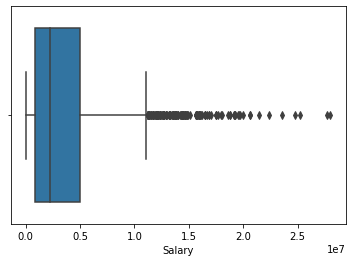

In [42]:
#Using Boxplot Method
sns.boxplot(df['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Count'>

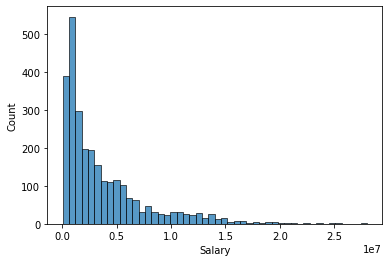

In [43]:
#Uisng Histogram Method
sns.histplot(df['Salary'])

### Find the Skewness in the data

In [44]:
df.skew().sort_values(ascending=False)

C:\Users\Anju\AppData\Local\Temp\ipykernel_10884\4024944668.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().sort_values(ascending=False)


Salary    1.870913
Year     -0.026248
dtype: float64

In [45]:
print(df['Salary'].mode())
print(df['Salary'].mean())
print(df['Salary'].median())

0    316969
Name: Salary, dtype: int32
3651991.8097136645
2200000.0


In [46]:
np.std(df['Salary'])

3910557.479708873

In [47]:
#Find Skewness using equalition 
# Skewness = (3*(Mean-Medaian)/Standard Deviation))
sk= (3* (df['Salary'].mean() - df['Salary'].median()))/ np.std(df['Salary'])

In [48]:
sk

1.1139013943007634

### Remove Outliers using IQR Method

In [49]:
Q1= np.percentile(df['Salary'],25,interpolation='midpoint')
print(Q1)
Q3= np.percentile(df['Salary'],75,interpolation='midpoint')
print(Q3)
IQR=Q3-Q1
print(IQR)

894180.0
5000000.0
4105820.0


In [50]:
upper = Q3+1.5*IQR
print(upper)
lower =Q1-1.5*IQR
print(lower)

11158730.0
-5264550.0


In [51]:
#Remove the ouliers from dataset
df2=df[df['Salary']<upper]

C:\Users\Anju\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

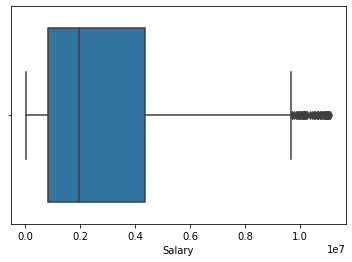

In [56]:
sns.boxplot(df2['Salary'])

In [53]:
df2.shape

(2568, 3)

In [54]:
df.shape

(2759, 3)